In [475]:
from scipy.io import savemat, loadmat
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from pprint import pprint
import cv2

In [476]:
room_types = loadmat('./matlab/RoomLayoutTypes.mat')['type']

type_ = []
for idx in range(room_types.shape[1]):
    room_type_entry = room_types[0, idx]
    typeid = int(room_type_entry[0].squeeze())
    region = room_type_entry[1].squeeze().tolist()
    cornermap = room_type_entry[2].squeeze()
    lines = room_type_entry[3].squeeze()

    type_entry = {
        'typeid': typeid,
        'region': region,
        'cornermap': cornermap,
        'lines': lines
    }
    type_.append(type_entry)

pprint(type_)

[{'cornermap': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8),
  'lines': array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 3],
       [3, 5],
       [5, 7],
       [7, 1]], dtype=uint8),
  'region': [array([[4, 3, 5, 6]], dtype=uint8),
             array([[3, 1, 7, 5]], dtype=uint8),
             array([[6, 5, 7, 8]], dtype=uint8),
             array([[2, 1, 3, 4]], dtype=uint8),
             array([[8, 7, 1, 2]], dtype=uint8)],
  'typeid': 0},
 {'cornermap': array([3, 1, 4, 5, 7, 6], dtype=uint8),
  'lines': array([[1, 2],
       [1, 3],
       [1, 4],
       [4, 5],
       [4, 6]], dtype=uint8),
  'region': [array([[3, 1, 4, 6]], dtype=uint8),
             array([[5, 4, 1, 2]], dtype=uint8),
             array([[6, 4, 5]], dtype=uint8),
             array([[2, 1, 3]], dtype=uint8),
             array([], shape=(0, 0), dtype=uint8)],
  'typeid': 1},
 {'cornermap': array([1, 2, 3, 7, 8, 5], dtype=uint8),
  'lines': array([[1, 2],
       [1, 3],
       [1, 4],
      

In [477]:
# i = 100
# i = 12
# i = 131
# i = 1063
# i = 102
i = 1076

im_h = 512
im_w = 512

# This appears to be the original image size.
# For now, make it equal to im_h, im_w
im_res = np.array([im_w, im_h])

results_dir = '/Users/richardkuodis/development/pytorch-layoutnet/res/lsun_tr_gt'

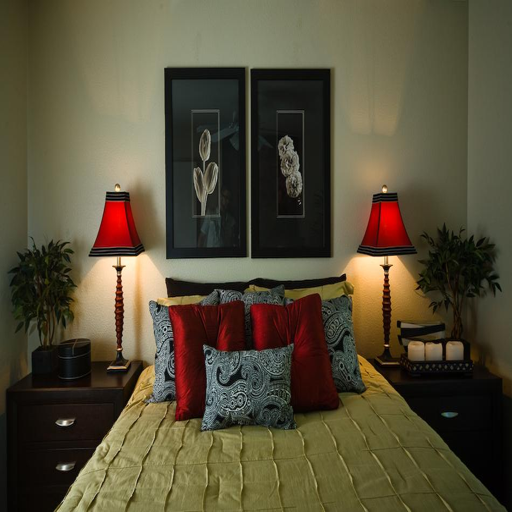

In [478]:
# im = Image.open(f'./result/res_lsun_ts_512_joint/img/{i}.png')
im = Image.open(os.path.join(results_dir, 'img', f'{i}.png'))
im

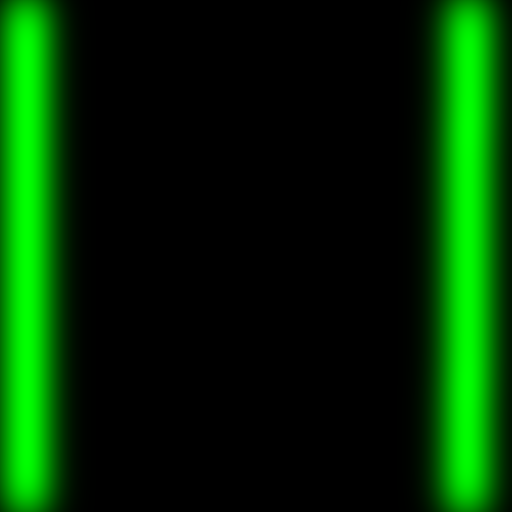

In [479]:
# edg = Image.open(f'./result/res_lsun_ts_512_joint/edg/{i}.png')
edg = Image.open(os.path.join(results_dir, 'edg', f'{i}.png'))

edg

In [480]:
edg = np.array(edg)
edg.shape

(512, 512, 3)

In [481]:
# corn = loadmat(f'./result/res_lsun_ts_512_joint/cor_mat/{i}.mat')['x']
corn = loadmat(os.path.join(results_dir, 'cor_mat', f'{i}.mat'))['x']

corn = corn.astype(np.float32)
np.save(f'./out/cor_mat_{i}.npy', corn)

corn = np.load(f'./out/cor_mat_{i}.npy')

# for l in range(0, 8):
#     plt.figure()
#     plt.title(f'corn_{l}')
#     plt.imshow(corn[l, :, :])

corn = corn.transpose(1, 2, 0)  # CHW -> HWC
corn.shape

(512, 512, 8)

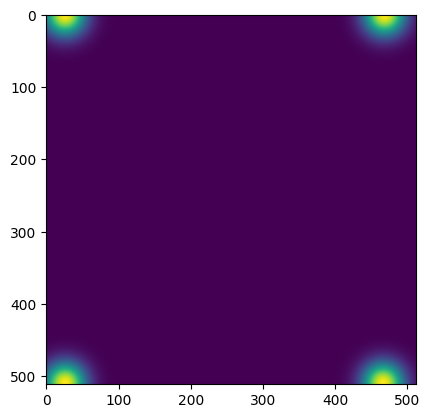

In [482]:
plt.imshow(corn.sum(axis=2));

In [483]:
os.path.join(results_dir, 'cor_mat', f'{i}.mat')

'/Users/richardkuodis/development/pytorch-layoutnet/res/lsun_tr_gt/cor_mat/1076.mat'

In [484]:
corn.dtype

dtype('float32')

In [485]:
os.path.join(results_dir, 'cor_mat_flip', f'{i}.mat')

'/Users/richardkuodis/development/pytorch-layoutnet/res/lsun_tr_gt/cor_mat_flip/1076.mat'

In [486]:
# corn_f = loadmat(f'./result/res_lsun_ts_512_joint/cor_mat_flip/{i}.mat')['x']
corn_f = loadmat(os.path.join(results_dir, 'cor_mat_flip', f'{i}.mat'))['x']

corn_f = corn_f.astype(np.float32)
np.save(f'./out/cor_mat_flip_{i}.npy', corn_f)

corn_f = np.load(f'./out/cor_mat_flip_{i}.npy')

# corn_f_2 = np.load(f'./out/cor_mat_flip_{i}.npy')

# for l in range(0, 8):
#     plt.figure()
#     plt.title(f'corn_f_{l}')
#     plt.imshow(corn_f[l, :, :])

#     plt.figure()
#     plt.title(f'corn_f_2_{i}')
#     plt.imshow(corn_f_2[i, :, :])

corn_f = corn_f.transpose(1, 2, 0)
corn_f.shape

(512, 512, 8)

In [487]:
os.path.join(os.getcwd(), f'./out/cor_mat_flip_{i}.npy')

'/Users/richardkuodis/development/Bath/LayoutNet/./out/cor_mat_flip_1076.npy'

In [488]:
corn_f.shape

(512, 512, 8)

In [489]:
# for i in range(0, 8):
#     plt.figure()
#     plt.title(f'{i}')
#     plt.imshow(corn[:, :, i])

In [490]:
# for i in range(0, 8):
#     plt.figure()
#     plt.title(f'{i}')
#     plt.imshow(corn_f[:, :, i])

In [491]:
# plt.imshow(corn[:, :, 4]);

In [492]:
# plt.imshow(corn_f[:, :, 4]);

In [493]:
# r_t = loadmat(f'./result/res_lsun_ts_512_joint/type/{i}.mat')['x']
r_t = loadmat(os.path.join(results_dir, 'type', f'{i}.mat'))['x']

r_t = r_t.astype(np.float32)
np.save(f'./out/type_{i}.npy', r_t)

r_t = r_t.mean(axis=0)
RecordId = r_t.argmax()

# FIXME: for debug
# RecordId = 9

pprint(r_t)
pprint(RecordId)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)
7


In [494]:
# FIXME: for debug
if RecordId == 7:
    RecordId = 1

In [495]:
room_t = type_[RecordId]
pprint(room_t)

{'cornermap': array([3, 1, 4, 5, 7, 6], dtype=uint8),
 'lines': array([[1, 2],
       [1, 3],
       [1, 4],
       [4, 5],
       [4, 6]], dtype=uint8),
 'region': [array([[3, 1, 4, 6]], dtype=uint8),
            array([[5, 4, 1, 2]], dtype=uint8),
            array([[6, 4, 5]], dtype=uint8),
            array([[2, 1, 3]], dtype=uint8),
            array([], shape=(0, 0), dtype=uint8)],
 'typeid': 1}


In [496]:
room_t['typeid']

1

In [497]:
# FIXME: Original code doesn't seem to support room types 7 and 8 (missing code).
#   We could interpret these room types as similar ones: 7 -> 0,1 and 8 -> 6.
#   Missing corners and edges could be added manually, if they are missing.  
#   Then lines that should not be present in this room type (e.g. floor edge on type 7->1 and other extended, if needed (e.g., vertical lines on type 7->1)
#   Type 8 could also be switched upside down and parsed as type 9, then flipped back down

if room_t['typeid'] == 0:
    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 6]
    corn_f[:, :, 6] = corn_t

    corn_t = corn_f[:, :, 2].copy()
    corn_f[:, :, 2] = corn_f[:, :, 4]
    corn_f[:, :, 4] = corn_t

    corn_t = corn_f[:, :, 1].copy()
    corn_f[:, :, 1] = corn_f[:, :, 7]
    corn_f[:, :, 7] = corn_t

    corn_t = corn_f[:, :, 3].copy()
    corn_f[:, :, 3] = corn_f[:, :, 5]
    corn_f[:, :, 5] = corn_t

    corn[:, :, 2] = np.maximum(0, corn[:, :, 2] - corn[:, :, 3])
    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 5])
    corn[:, :, 0] = np.maximum(0, corn[:, :, 0] - corn[:, :, 1])
    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 7])

    corn_f[:, :, 2] = np.maximum(0, corn_f[:, :, 2] - corn_f[:, :, 3])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 5])
    corn_f[:, :, 0] = np.maximum(0, corn_f[:, :, 0] - corn_f[:, :, 1])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 7])

    corn[:, 399, 0] = 0
    corn[:, 399:, 2] = 0
    corn[:, 0:112, 6] = 0

    a = corn[:, :, 4].copy()
    b = corn[:, :, 2].copy()
    corn[:, :, 4] = np.maximum(corn[:, :, 4] - b, 0)
    corn[:, :, 2] = np.maximum(corn[:, :, 2] - a, 0)

    # FIXME: probably there was an eror in the original code, as it used corn_f here instead of corn (duplicating at the bottom)
    a = corn[:, :, 0].copy()
    b = corn[:, :, 6].copy()
    corn[:, :, 0] = np.maximum(corn[:, :, 0] - b, 0)
    corn[:, :, 6] = np.maximum(corn[:, :, 6] - a, 0)

    a = corn_f[:, :, 4].copy()
    b = corn_f[:, :, 2].copy()
    corn_f[:, :, 4] = np.maximum(corn_f[:, :, 4] - b, 0)
    corn_f[:, :, 2] = np.maximum(corn_f[:, :, 2] - a, 0)

    a = corn_f[:, :, 0].copy()
    b = corn_f[:, :, 6].copy()
    corn_f[:, :, 0] = np.maximum(corn_f[:, :, 0] - b, 0)
    corn_f[:, :, 6] = np.maximum(corn_f[:, :, 6] - a, 0)

elif room_t['typeid'] == 1:
    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 6]
    corn_f[:, :, 6] = corn_t

    corn_t = corn_f[:, :, 2].copy()
    corn_f[:, :, 2] = corn_f[:, :, 4]
    corn_f[:, :, 4] = corn_t

    corn_t = corn_f[:, :, 3].copy()
    corn_f[:, :, 3] = corn_f[:, :, 5]
    corn_f[:, :, 5] = corn_t
    
    corn[:, :, 2] = np.maximum(0, corn[:, :, 2] - corn[:, :, 3])
    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 5])
    corn_f[:, :, 2] = np.maximum(0, corn_f[:, :, 2] - corn_f[:, :, 3])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 5])
    
    a = corn[:, :, 4].copy()
    b = corn[:, :, 2].copy()
    corn[:, :, 4] = np.maximum(corn[:, :, 4] - b, 0)
    corn[:, :, 2] = np.maximum(corn[:, :, 2] - a, 0)
    
    a = corn[:, :, 0].copy()
    b = corn[:, :, 6].copy()
    corn[:, :, 0] = np.maximum(corn[:, :, 0] - b, 0)
    corn[:, :, 6] = np.maximum(corn[:, :, 6] - a, 0)
    
    a = corn_f[:, :, 4].copy()
    b = corn_f[:, :, 2].copy()
    corn_f[:, :, 4] = np.maximum(corn_f[:, :, 4] - b, 0)
    corn_f[:, :, 2] = np.maximum(corn_f[:, :, 2] - a, 0)
    
    a = corn_f[:, :, 0].copy()
    b = corn_f[:, :, 6].copy()
    corn_f[:, :, 0] = np.maximum(corn_f[:, :, 0] - b, 0)
    corn_f[:, :, 6] = np.maximum(corn_f[:, :, 6] - a, 0)

elif room_t['typeid'] == 2:
    corn_t = corn_f[:, :, 1].copy()
    corn_f[:, :, 1] = corn_f[:, :, 7]
    corn_f[:, :, 7] = corn_t

    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 6]
    corn_f[:, :, 6] = corn_t

    corn_t = corn_f[:, :, 2].copy()
    corn_f[:, :, 2] = corn_f[:, :, 4]
    corn_f[:, :, 4] = corn_t

    corn[:, :, 0] = np.maximum(0, corn[:, :, 0] - corn[:, :, 1])
    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 7])
    corn_f[:, :, 0] = np.maximum(0, corn_f[:, :, 0] - corn_f[:, :, 1])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 7])

    a = corn[:, :, 4].copy()
    b = corn[:, :, 2].copy()
    corn[:, :, 4] = np.maximum(corn[:, :, 4] - b, 0)
    corn[:, :, 2] = np.maximum(corn[:, :, 2] - a, 0)

    a = corn[:, :, 0].copy()
    b = corn[:, :, 6].copy()
    corn[:, :, 0] = np.maximum(corn[:, :, 0] - b, 0)
    corn[:, :, 6] = np.maximum(corn[:, :, 6] - a, 0)

    a = corn_f[:, :, 4].copy()
    b = corn_f[:, :, 2].copy()
    corn_f[:, :, 4] = np.maximum(corn_f[:, :, 4] - b, 0)
    corn_f[:, :, 2] = np.maximum(corn_f[:, :, 2] - a, 0)

    a = corn_f[:, :, 0].copy()
    b = corn_f[:, :, 6].copy()
    corn_f[:, :, 0] = np.maximum(corn_f[:, :, 0] - b, 0)
    corn_f[:, :, 6] = np.maximum(corn_f[:, :, 6] - a, 0)

elif room_t['typeid'] == 3:
    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 7]
    corn_f[:, :, 7] = corn_t

    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 0])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 0])

    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 7])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 7])

    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 2])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 2])

elif room_t['typeid'] == 4:
    corn_t = corn_f[:, :, 2].copy()  # Mind that indexing in Matlab starts from 1, not 0
    corn_f[:, :, 2] = corn_f[:, :, 5]
    corn_f[:, :, 5] = corn_t

    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 2])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 2])

    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 5])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 5])

    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 0])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 0])
elif room_t['typeid'] == 5:
    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 7]
    corn_f[:, :, 7] = corn_t

    corn_t = corn_f[:, :, 2].copy()
    corn_f[:, :, 2] = corn_f[:, :, 5]
    corn_f[:, :, 5] = corn_t

    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 0])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 0])

    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 2])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 2])

    corn[:, :, 6] = np.maximum(0, corn[:, :, 6] - corn[:, :, 7])
    corn_f[:, :, 6] = np.maximum(0, corn_f[:, :, 6] - corn_f[:, :, 7])

    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 5])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 5])
elif room_t['typeid'] == 6:
    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 6]
    corn_f[:, :, 6] = corn_t

    corn_t = corn_f[:, :, 2].copy()
    corn_f[:, :, 2] = corn_f[:, :, 4]
    corn_f[:, :, 4] = corn_t

    corn[:, :, 2] = np.maximum(0, corn[:, :, 2] - corn[:, :, 3])
    corn[:, :, 4] = np.maximum(0, corn[:, :, 4] - corn[:, :, 5])
    
    corn_f[:, :, 2] = np.maximum(0, corn_f[:, :, 2] - corn_f[:, :, 3])
    corn_f[:, :, 4] = np.maximum(0, corn_f[:, :, 4] - corn_f[:, :, 5])
elif room_t['typeid'] == 7:
    # Do nothing (unimplemented?)
    pass
elif room_t['typeid'] == 8:
    # Do nothing
    # pass
    corn_t = corn_f[:, :, 0].copy()
    corn_f[:, :, 0] = corn_f[:, :, 6]
    corn_f[:, :, 6] = corn_t
elif room_t['typeid'] == 9:
    corn_t = corn_f[:, :, 2].copy()
    corn_f[:, :, 2] = corn_f[:, :, 4]
    corn_f[:, :, 4] = corn_t
elif room_t['typeid'] == 10:
    # Do nothing
    pass
else:
    # TODO
    raise Exception(f'Unsupported room type {room_t["typeid"]} (yet)')

    ...

In [498]:
len(room_t['cornermap'])

6

In [499]:
# Find corner
point = []
ctr = 0
for j in range(len(room_t['cornermap'])):
    corn_idx = room_t['cornermap'][j] - 1

    # plt.figure()
    # plt.title(f'corn_{corn_idx}')
    # plt.imshow(corn[:, :, corn_idx])
    
    # plt.figure()
    # plt.title(f'corn_f_{corn_idx}')
    # plt.imshow(corn_f[:, :, corn_idx])
    
    # plt.figure()
    # plt.title(f'corn_f_flipped_{corn_idx}')
    # plt.imshow(np.fliplr(corn_f[:, :, corn_idx]))


    mp = corn[:, :, corn_idx] + np.fliplr(corn_f[:, :, corn_idx])
    mp[:, 0] = 0
    mp[:, im_w - 1] = 0
    mp[0, :] = 0
    mp[im_h - 1, :] = 0

    # plt.figure()
    # plt.imshow(mp)

    # mp_mat = loadmat(f'./matlab/mp{j + 1}.mat')
    # mp2 = mp_mat['mp']
    # mp_msk2 = mp_mat['mp_msk']

    mp_msk = np.zeros_like(mp, dtype=np.float32)

    # TODO: handle other room types
    if room_t['typeid'] == 1:
        if room_t['cornermap'][j] == 7 or room_t['cornermap'][j] == 1:
            mp_msk = edg[:, :, 1] > 255 * 0.1
        elif room_t['cornermap'][j] == 3:
            mp_msk = edg[:, :, 1] > 255 * 0.1
            
            mp_t = ((corn[:, :, 0] + np.fliplr(corn_f[:, :, 0])) / 2.0).copy()
            mp_t[:, 0] = 0
            mp_t[:, im_w - 1] = 0
            mp_t[0, :] = 0
            mp_t[im_h - 1, :] = 0
            mp_t = mp_t * mp_msk
            
            flat = np.ravel(mp_t, order='F')

            pt = np.argmax(flat)
            pt_x, _ = np.unravel_index(pt, mp_t.shape)

            mp_msk[:, :(max(pt_x - 50, 1) + 1)] = 0
            mp_msk[:, min(pt_x + 50, im_w - 1):] = 0
        elif room_t['cornermap'][j] == 5:
            mp_msk = edg[:, :, 1] > 255 * 0.1
            
            mp_t = ((corn[:, :, 6] + np.fliplr(corn_f[:, :, 6])) / 2.0).copy()
            mp_t[:, 0] = 0
            mp_t[:, im_w - 1] = 0
            mp_t[0, :] = 0
            mp_t[im_h - 1, :] = 0
            mp_t = mp_t * mp_msk
            
            flat = np.ravel(mp_t, order='F')

            pt = np.argmax(flat)
            pt_x, _ = np.unravel_index(pt, mp_t.shape)

            mp_msk[:, :(max(pt_x - 50, 1) + 1)] = 0
            mp_msk[:, min(pt_x + 50, im_w - 1):] = 0
        elif room_t['cornermap'][j] == 4 or room_t['cornermap'][j] == 6:
            mp_msk = edg[:, :, 2] > 255 * 0.1
    elif room_t['typeid'] == 2:
        if room_t['cornermap'][j] == 2 or room_t['cornermap'][j] == 8:
            mp_msk = edg[:, :, 0] > 255 * 0.1
        elif room_t['cornermap'][j] == 5 or room_t['cornermap'][j] == 3 or room_t['cornermap'][j] == 1 or room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 1] > 255 * 0.1

    elif room_t['typeid'] == 3:
        if room_t['cornermap'][j] == 1 or room_t['cornermap'][j] == 8:
            mp_msk = edg[:, :, 0] > 255 * 0.1
        elif room_t['cornermap'][j] == 5 or room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 1] > 255 * 0.1
            
    elif room_t['typeid'] == 4:
        if room_t['cornermap'][j] == 5:
            mp_msk = edg[:, :, 1] > 255 * 0.1
        elif room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 1] > 255 * 0.1
            
            mp_t = ((corn[:, :, 4] + np.fliplr(corn_f[:, :, 4])) / 2.0).copy()
            mp_t[:, 0] = 0
            mp_t[:, im_w - 1] = 0
            mp_t[0, :] = 0
            mp_t[im_h - 1, :] = 0
            mp_t = mp_t * mp_msk

            flat = np.ravel(mp_t, order='F')
            print(f'Flat: {flat[:10]}')

            pt = np.argmax(flat)
            pt_x, _ = np.unravel_index(pt, mp_t.shape)

            mp_msk[:, :(max(pt_x - 50, 1) + 1)] = 0
            mp_msk[:, min(pt_x + 50, im_w - 1):] = 0
        elif room_t['cornermap'][j] == 3 or room_t['cornermap'][j] == 6:
            mp_msk = edg[:, :, 2] > 255 * 0.1

    elif room_t['typeid'] == 5:
        if room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 1] > 255 * 0.1
        elif room_t['cornermap'][j] == 5:
            mp_msk = edg[:, :, 1] > 255 * 0.1

            mp_t = ((corn[:, :, 6] + np.fliplr(corn_f[:, :, 6])) / 2.0).copy()
            mp_t[:, 0] = 0
            mp_t[:, im_w - 1] = 0
            mp_t[0, :] = 0
            mp_t[im_h - 1, :] = 0
            mp_t = mp_t * mp_msk

            flat = np.ravel(mp_t, order='F')

            pt = np.argmax(flat)
            pt_x, pt_y = np.unravel_index(pt, mp_t.shape)

            mp_msk[:, :(max(pt_x - 50, 1) + 1)] = 0
            mp_msk[:, min(pt_x + 50, im_w - 1):] = 0
        elif room_t['cornermap'][j] == 1 or room_t['cornermap'][j] == 8:
            mp_msk = edg[:, :, 0] > 255 * 0.1
        elif room_t['cornermap'][j] == 3 or room_t['cornermap'][j] == 6:
            mp_msk = edg[:, :, 2] > 255 * 0.1

    elif room_t['typeid'] == 6:
        if room_t['cornermap'][j] == 1 or room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 0] > 255 * 0.1
        elif room_t['cornermap'][j] == 3 or room_t['cornermap'][j] == 5:
            mp_msk = edg[:, :, 2] > 255 * 0.1

    elif room_t['typeid'] == 7:
        # Do nothing
        pass

    elif room_t['typeid'] == 8:
        # Do nothing
        # pass
        if room_t['cornermap'][j] == 1 or room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 2] > 255 * 0.1

    elif room_t['typeid'] == 9:
        if room_t['cornermap'][j] == 5 or room_t['cornermap'][j] == 3:
            mp_msk = edg[:, :, 2] > 255 * 0.1

    elif room_t['typeid'] == 10:
        if room_t['cornermap'][j] == 5 or room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 1] > 255 * 0.1
            
    elif room_t['typeid'] == 0:
        if room_t['cornermap'][j] == 5 or room_t['cornermap'][j] == 3:
            mp_msk = edg[:, :, 1] > 255 * 0.1
        elif room_t['cornermap'][j] == 1:
            mp_msk = edg[:, :, 1] > 255 * 0.1

            mp_t = ((corn[:, :, 2] + np.fliplr(corn_f[:, :, 2])) / 2.0).copy()
            mp_t[:, 0] = 0;
            mp_t[:, im_w - 1] = 0
            mp_t[0, :] = 0
            mp_t[im_h - 1, :] = 0
            mp_t = mp_t * mp_msk

            flat = np.ravel(mp_t, order='F')

            pt = np.argmax(flat)
            pt_x, _ = np.unravel_index(pt, mp_t.shape)

            mp_msk[:, :(max(pt_x - 50, 1) + 1)] = 0
            mp_msk[:, min(pt_x + 50, im_w - 1):] = 0
        elif room_t['cornermap'][j] == 7:
            mp_msk = edg[:, :, 1] > 255 * 0.1

            mp_t = ((corn[:, :, 4] + np.fliplr(corn_f[:, :, 4])) / 2.0).copy()
            mp_t[:, 0] = 0;
            mp_t[:, im_w - 1] = 0
            mp_t[0, :] = 0
            mp_t[im_h - 1, :] = 0
            mp_t = mp_t * mp_msk

            flat = np.ravel(mp_t, order='F')

            pt = np.argmax(flat)
            pt_x, _ = np.unravel_index(pt, mp_t.shape)

            mp_msk[:, :(max(pt_x - 50, 1) + 1)] = 0
            mp_msk[:, min(pt_x + 50, im_w - 1):] = 0
        elif room_t['cornermap'][j] == 8 or room_t['cornermap'][j] == 2:
            mp_msk = edg[:, :, 0] > 255 * 0.1
        elif room_t['cornermap'][j] == 4 or room_t['cornermap'][j] == 6:
            mp_msk = edg[:, :, 2] > 255 * 0.1

    else:
        raise Exception(f'Room type {room_t["typeid"]} not supported yet!')

    # ctr += 1
    # plt.figure()
    # plt.imshow(mp)
    # plt.title(f'mp_{ctr}')

    mp = mp * mp_msk

    # plt.figure()
    # plt.title(f'mp_post_{ctr}')
    # plt.imshow(mp)

    # plt.figure()
    # plt.title(f'mp_msk_{ctr}')
    # plt.imshow(mp_msk)

    # Different order than in Matlab because Matlab arrays are column-first, whereas in numpy arrays are row-first
    # Although indexing starts with row, as in numpy
    pt = np.argmax(np.ravel(mp, order='F') / 2)
    pt_y, pt_x = np.unravel_index(pt, mp.shape)

    print(f"XDEBUG: {room_t['cornermap'][j]} pt_x={pt_x}, pt_y={pt_y}")

    point.append([pt_x, pt_y])

point = np.array(point)
pprint(point)

XDEBUG: 3 pt_x=510, pt_y=26
XDEBUG: 1 pt_x=1, pt_y=26
XDEBUG: 4 pt_x=0, pt_y=0
XDEBUG: 5 pt_x=510, pt_y=466
XDEBUG: 7 pt_x=1, pt_y=468
XDEBUG: 6 pt_x=0, pt_y=0
array([[510,  26],
       [  1,  26],
       [  0,   0],
       [510, 466],
       [  1, 468],
       [  0,   0]])


In [500]:
point_res = np.array([
    point[:, 1],
    point[:, 0]
]).T  # Transpose to match Matlab output

# Basically is the same result as point:
# assert np.allclose(point, point_res)

point_res, point_res.shape

(array([[ 26, 510],
        [ 26,   1],
        [  0,   0],
        [466, 510],
        [468,   1],
        [  0,   0]]),
 (6, 2))

In [501]:
cor_res = im_res / np.array([im_w, im_h])

cor_res

array([1., 1.])

In [502]:
point_ref_res = (point_res * cor_res)

# [[y, x]]
point_ref_res

array([[ 26., 510.],
       [ 26.,   1.],
       [  0.,   0.],
       [466., 510.],
       [468.,   1.],
       [  0.,   0.]])

In [503]:
point_ref_res[point_ref_res[:, 0] > im_res[1], 0] = im_res[1]  # Exceeds height
point_ref_res[point_ref_res[:, 1] > im_res[0], 0] = im_res[0]  # Exceeds width
point_ref_res[point_ref_res < 0] = 0
point_ref_res

array([[ 26., 510.],
       [ 26.,   1.],
       [  0.,   0.],
       [466., 510.],
       [468.,   1.],
       [  0.,   0.]])

In [504]:
# Refine point
point = point_ref_res
point_ref = point.copy()

point

array([[ 26., 510.],
       [ 26.,   1.],
       [  0.,   0.],
       [466., 510.],
       [468.,   1.],
       [  0.,   0.]])

In [505]:
# [0 0; 0 im_res(1)+0.01; im_res(2)+0.01 im_res(1)+0.01; im_res(2)+0.01 0]
P = np.array([
    [0, 0],
    [0, im_res[0] + 0.01],
    [im_res[1] + 0.01, im_res[0] + 0.01],
    [im_res[1] + 0.01, 0]
])
P = P.T

P

array([[  0.  ,   0.  , 512.01, 512.01],
       [  0.  , 512.01, 512.01,   0.  ]])

In [506]:
P = np.hstack((P, P[:, 0][:, None]))

P

array([[  0.  ,   0.  , 512.01, 512.01,   0.  ],
       [  0.  , 512.01, 512.01,   0.  ,   0.  ]])

In [507]:
def seg2poly(s1, P):
    '''
    Check if a line segment s intersects with a polygon P.

    Parameteres:
        s: (2 x 2) array where
            s[:, 0] is the first point
            s[:, 1] is the second point of the segment
        P is (2 x n) array, each column is a vertice
    
    Returns:
        A (2 x m) array, each column is an intersecting point

    '''
    ...

    a = np.expand_dims(s1[:, 0], axis=1)
    M = P - a
    print(f'M: {M}')

    b = (np.expand_dims(s1[:, 1], axis=1) - a)
    print(f'b: {b}')
    b = np.array([b[0, 0], b[1, 0]])
    print(f'b: {b}')

    # In the original code it is [b(2) - b(1)] * M
    x = np.array([b[1], -b[0]]).dot(M)
    print(f'x: {x}')

    sx = np.sign(x)
    print(f'sx: {sx}')

    ind = (sx[0:-1] * sx[1:]) <= 0
    print(f'ind: {ind}')

    if np.any(ind):
        ind = np.where(ind)
        print(f'ind: {ind}')
        # Cross point to the y-axis (along the segment)
        x1 = x[ind]
        x2 = x[ind + np.array([1])][0]
        print(f'ind + np.array([1]): {ind + np.array([1])}')
        print(f'x[ind + np.array([1])]: {x[ind + np.array([1])]}')
        print(f'x1: {x1}, x2: {x2}')

        d = b / (b[0] ** 2 + b[1] ** 2)
        print(f'b: {b}')
        print(f'd: {d}')

        print(f'M[:, ind]: {M[:, ind]}')
        print(f'M[:, ind].squeeze(): {M[:, ind].squeeze()}')
        y1 = d.dot(M[:, ind].squeeze())
        y2 = d.dot(M[:, ind + np.array([1])].squeeze())
        print(f'y1: {y1}')
        print(f'y2: {y2}')

        dx = x2 - x1
        print(f'dx: {dx}')

        # We won't bother with the degenerate case of dx=0 and x1=0
        y = (y1 * x2 - y2 * x1) / dx
        print(f'y: {y}')

        # Check if the cross point is inside the segment
        ind = np.logical_and(y >= 0, y < 1)
        print(f'ind: {ind}')
        if np.any(ind):
            print('aaa')
            X = a.squeeze() + b * y[np.where(ind)]
            print(f'X: {X}')
            # print(f'b * y[np.where(ind)]: {b * y[np.where(ind)]}')
            # print(f'a: {a}')
            print(f'a.squeeze(): {a.squeeze()}')
            # print(f'np.where(ind): {np.where(ind)}')
            # print(f'y[np.where(ind)]: {y[np.where(ind)]}')
        else:
            print('bbb')
            X = np.zeros((2,))
    else:
        print('ccc')
        X = np.zeros((2,))

    # print('\t returning', X)
    return X


t_s1 = np.array([
    [157.0, -100.0],
    [331.0, 530.8889]
])
t_P = np.array([
    [0.0, 0.0, 512.01, 512.01, 0.0],
    [0.0, 512.01, 512.01, 0.0, 0.0]
])

res = seg2poly(t_s1, t_P)
assert np.allclose(res, np.array([0.0, 453.1111]))
res

M: [[-157.   -157.    355.01  355.01 -157.  ]
 [-331.    181.01  181.01 -331.   -331.  ]]
b: [[-257.    ]
 [ 199.8889]]
b: [-257.      199.8889]
x: [-116449.5573     15137.0127    117482.128389  -14104.441611
 -116449.5573  ]
sx: [-1.  1.  1. -1. -1.]
ind: [ True False  True False]
ind: (array([0, 2]),)
ind + np.array([1]): [[1 3]]
x[ind + np.array([1])]: [[ 15137.0127   -14104.441611]]
x1: [-116449.5573    117482.128389], x2: [ 15137.0127   -14104.441611]
b: [-257.      199.8889]
d: [-0.00242442  0.00188566]
M[:, ind]: [[[-157.    355.01]]

 [[-331.    181.01]]]
M[:, ind].squeeze(): [[-157.    355.01]
 [-331.    181.01]]
y1: [-0.24351993 -0.51937081]
y2: [ 0.72195838 -1.48484912]
dx: [ 131586.57 -131586.57]
y: [ 0.61089494 -1.38136187]
ind: [ True False]
aaa
X: [2.84217094e-14 4.53111118e+02]
a.squeeze(): [157. 331.]


array([2.84217094e-14, 4.53111118e+02])

In [508]:
# Refine point
if room_t['typeid'] == 0:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T

    line_1 = np.polyfit(
        [point[2, 0], point[3, 0]],
        [point[2, 1], point[3, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[2, 0], point[2, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[3, :] = X.T

    line_1 = np.polyfit(
        [point[4, 0], point[5, 0]],
        [point[4, 1], point[5, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[4, 0], point[4, 1]]
    s1[:, 1] = [100000, 100000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[5, :] = X.T

    line_1 = np.polyfit(
        [point[6, 0], point[7, 0]],
        [point[6, 1], point[7, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[6, 0], point[6, 1]]
    s1[:, 1] = [100000, 100000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[7, :] = X.T

elif room_t['typeid'] == 1:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [(-1 - line_1[1]) / line_1[0], -1]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T
    
    line_1 = np.polyfit(
        [point[0, 0], point[2, 0]],
        [point[0, 1], point[2, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[2, :] = X.T
    
    if point[3, 0] == point[4, 0]:
        point[4, 0] = point[4, 0] + 0.01
    
    line_1 = np.polyfit(
        [point[3, 0], point[4, 0]],
        [point[3, 1], point[4, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[3, 0], point[3, 1]]
    s1[:, 1] = [(-1 - line_1[1]) / line_1[0], -1]
    X = seg2poly(s1, P)
    point_ref[4, :] = X.T
    
    
    line_1 = np.polyfit(
        [point[3, 0], point[5, 0]],
        [point[3, 1], point[5, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[3, 0], point[3, 1]]
    s1[:, 1] = [100000, 100000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[5, :] = X.T

elif room_t['typeid'] == 2:
    # Do nothing
    print(f'Doing nothing for type 2')
    pass

elif room_t['typeid'] == 3:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[1, :] = X

    line_1 = np.polyfit(
        [point[0, 0], point[3, 0]],
        [point[0, 1], point[3, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [100000, 100000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[3, : ] = X

    line_1 = np.polyfit(
        [point[0, 0], point[2, 0]],
        [point[0, 1], point[2, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [(10000 - line_1[1]) / line_1[0], 10000]
    X = seg2poly(s1, P)
    point_ref[2, : ] = X
    
elif room_t['typeid'] == 4:
    # Find a polynomial of degree 1 that passes through points indicated by these x and y arrays
    # Effectivaly, this is a line
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )

    viz = True
    if viz:
        xn = np.linspace(0, 512, 100)
        yn = np.poly1d(line_1)
        plt.plot(xn, yn(xn), [point[0, 0], point[1, 0]],
                 [point[0, 1], point[1, 1]], 'o')
        plt.title(f'Polynomial passing through {point[0]} and {point[1]}')
        plt.grid()

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]

    X = seg2poly(s1, P)

    point_ref[1, :] = X.T

    if point[0, 0] == point[2, 0]:
        point[0, 0] = point[0, 0] + 0.01

    line_1 = np.polyfit(
        [point[0, 0], point[2, 0]],
        [point[0, 1], point[2, 1]],
        1
    )

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [(-1 - line_1[1]) / line_1[0], -1]
    X = seg2poly(s1, P)
    point_ref[2, :] = X.T  # Transpose is not actually necessary in numpy here

    line_1 = np.polyfit(
        [point[0, 0], point[3, 0]],
        [point[0, 1], point[3, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [10000, 10000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)

    point_ref[3, :] = X.T  # Transpose is not actually necessary in numpy here
elif room_t['typeid'] == 5:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    print(f'line_1: {line_1}')
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T

    line_1 = np.polyfit(
        [point[0, 0], point[2, 0]],
        [point[0, 1], point[2, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [10000, 10000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[2, :] = X.T

    line_1 = np.polyfit(
        [point[3, 0], point[4, 0]],
        [point[3, 1], point[4, 1]],
        1
    )
    s1[:, 0] = [point[3, 0], point[3, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[4, :] = X.T

    line_1 = np.polyfit(
        [point[3, 0], point[5, 0]],
        [point[3, 1], point[5, 1]],
        1
    )
    s1[:, 0] = [point[3, 0], point[3, 1]]
    s1[:, 1] = [10000, 10000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[5, :] = X.T

elif room_t['typeid'] == 6:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[0, :] = X.T

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[1, 0], point[1, 1]]
    s1[:, 1] = [10000, 10000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T


    line_1 = np.polyfit(
        [point[2, 0], point[3, 0]],
        [point[2, 1], point[3, 1]],
        1
    )

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[2, 0], point[2, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[2, :] = X.T

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[3, 0], point[3, 1]]
    s1[:, 1] = [10000, 1000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[3, :] = X.T

elif room_t['typeid'] == 7:
    # Do nothing
    pass

elif room_t['typeid'] == 8:
    # Do nothing
    # pass
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[0, :] = X.T

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[1, 0], point[1, 1]]
    s1[:, 1] = [10000, 10000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T

elif room_t['typeid'] == 9:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [-100, -100 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[0, :] = X.T

    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[1, 0], point[1, 1]]
    s1[:, 1] = [10000, 10000 * line_1[0] + line_1[1]]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T

elif room_t['typeid'] == 10:
    line_1 = np.polyfit(
        [point[0, 0], point[1, 0]],
        [point[0, 1], point[1, 1]],
        1
    )
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[0, 0], point[0, 1]]
    s1[:, 1] = [(1 - line_1[1]) / line_1[0], -1]
    X = seg2poly(s1, P)
    point_ref[0, :] = X.T
    
    s1 = np.zeros((2, 2))
    s1[:, 0] = [point[1, 0], point[1, 1]]
    s1[:, 1] = [(10000 - line_1[1]) / line_1[0], 10000]
    X = seg2poly(s1, P)
    point_ref[1, :] = X.T

else:
    raise Exception(f'Room type {room_t["typeid"]} not supported yet')



M: [[ -26.    -26.    486.01  486.01  -26.  ]
 [-510.      2.01    2.01 -510.   -510.  ]]
b: [[ -52.2035225]
 [-511.       ]]
b: [ -52.2035225 -511.       ]
x: [ -13337.7964775    13390.92908023 -248246.18091977 -274974.9064775
  -13337.7964775 ]
sx: [-1.  1. -1. -1. -1.]
ind: [ True  True False False]
ind: (array([0, 1]),)
ind + np.array([1]): [[1 2]]
x[ind + np.array([1])]: [[  13390.92908023 -248246.18091977]]
x1: [-13337.7964775   13390.92908023], x2: [  13390.92908023 -248246.18091977]
b: [ -52.2035225 -511.       ]
d: [-0.00019786 -0.00193673]
M[:, ind]: [[[ -26.    -26.  ]]

 [[-510.      2.01]]]
M[:, ind].squeeze(): [[ -26.    -26.  ]
 [-510.      2.01]]
y1: [0.99287874 0.00125142]
y2: [ 0.00125142 -0.10005277]
dx: [  26728.72555773 -261637.11      ]
y: [ 0.49805068 -0.00393346]
ind: [ True False]
aaa
X: [-3.55271368e-15  2.55496101e+02]
a.squeeze(): [ 26. 510.]
M: [[ -26.    -26.    486.01  486.01  -26.  ]
 [-510.      2.01    2.01 -510.   -510.  ]]
b: [[ -126.        ]
 [-247

/var/folders/6g/xckc77ps3v72htb_97t7k8440000gn/T/ipykernel_4123/1910393983.py:48: RankWarning: Polyfit may be poorly conditioned
  line_1 = np.polyfit(


In [509]:
data = {}
data['type'] = room_t['typeid']
data['point'] = point_ref
data['resolution'] = im_res

data

{'type': 1,
 'point': array([[ 2.60000000e+01,  5.10000000e+02],
        [-3.55271368e-15,  2.55496101e+02],
        [ 0.00000000e+00,  1.70530257e-13],
        [ 4.66000000e+02,  5.10000000e+02],
        [ 4.68003929e+02, -5.68434189e-14],
        [ 4.67836588e+02,  5.12010000e+02]]),
 'resolution': array([512, 512])}

In [510]:
type_

[{'typeid': 0,
  'region': [array([[4, 3, 5, 6]], dtype=uint8),
   array([[3, 1, 7, 5]], dtype=uint8),
   array([[6, 5, 7, 8]], dtype=uint8),
   array([[2, 1, 3, 4]], dtype=uint8),
   array([[8, 7, 1, 2]], dtype=uint8)],
  'cornermap': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8),
  'lines': array([[1, 2],
         [3, 4],
         [5, 6],
         [7, 8],
         [1, 3],
         [3, 5],
         [5, 7],
         [7, 1]], dtype=uint8)},
 {'typeid': 1,
  'region': [array([[3, 1, 4, 6]], dtype=uint8),
   array([[5, 4, 1, 2]], dtype=uint8),
   array([[6, 4, 5]], dtype=uint8),
   array([[2, 1, 3]], dtype=uint8),
   array([], shape=(0, 0), dtype=uint8)],
  'cornermap': array([3, 1, 4, 5, 7, 6], dtype=uint8),
  'lines': array([[1, 2],
         [1, 3],
         [1, 4],
         [4, 5],
         [4, 6]], dtype=uint8)},
 {'typeid': 2,
  'region': [array([], shape=(0, 0), dtype=uint8),
   array([[3, 1, 4, 6]], dtype=uint8),
   array([[6, 4, 5]], dtype=uint8),
   array([[2, 1, 3]], dtype=uint8)

In [511]:
type_[5]['lines']

array([[1, 2],
       [1, 3],
       [1, 4],
       [4, 5],
       [4, 6]], dtype=uint8)

In [512]:
import numpy as np
import cv2
from scipy.ndimage import label, binary_erosion


def getSegmentation(data):
    # GETSEGMENTATION CONVERT ROOM LAYOUT TO SEGMENTATION MASK
    #   data.type: room layout type
    #   data.point: room corners position
    #   data.resolution: [w h] of the image

    if data['type'] == 11:
        segment = None
        return segment

    # TODO: convert `type_` to be dict where key is typeid
    type_data = type_[data['type']]

    point = data['point']
    # lines describes the layout line ordering in this room type
    lines = type_data['lines']
    print(f'lines: {lines}')

    # Some room types in their type data have only one line, which results in 1d array.
    # TODO: this could better be fixed in type_ dict
    if len(lines.shape) == 1:
        lines = np.expand_dims(lines, axis=0)

    # Convert 'point' to integer type
    point = point.astype(int)
    print(f'point: {point}')

    # Select first point using room lines info
    print(f'lines[:, 0] - 1: {lines[:, 0] - 1}')
    pt1s = point[lines[:, 0] - 1]
    print(f'pt1s: {pt1s}')
    pt1s[pt1s <= 0] = 1
    pt1s[pt1s[:, 0] > data['resolution'][0], 0] = data['resolution'][0]
    pt1s[pt1s[:, 1] > data['resolution'][1], 1] = data['resolution'][1]
    print(f'pt1s: {pt1s}')

    pt2s = point[lines[:, 1] - 1]
    print(f'pt2s: {pt2s}')
    pt2s[pt2s <= 0] = 1
    pt2s[pt2s[:, 0] > data['resolution'][0], 0] = data['resolution'][0]
    pt2s[pt2s[:, 1] > data['resolution'][1], 1] = data['resolution'][1]

    lineplot = np.zeros(data['resolution'], dtype=np.uint8)
    line_coords = []
    for pt1, pt2 in zip(pt1s, pt2s):
        pt1 = tuple(pt1)
        pt2 = tuple(pt2)
        lineplot = cv2.line(lineplot, pt1, pt2, 1, 1)
        line_coords.append((pt1, pt2))

    labeled_array, num_features = label(1 - lineplot)

    segment = np.zeros(data['resolution'], dtype=int)
    for i in range(1, num_features + 1):
        segment[labeled_array == i] = i

    se = np.ones((2, 2), dtype=bool)  # Equivalent to strel('disk', 2) in MATLAB
    # Make lines wider for better visalization
    segment = binary_erosion(segment, structure=se)

    return segment, line_coords


segm, lines = getSegmentation(data)
segm.shape, lines

lines: [[1 2]
 [1 3]
 [1 4]
 [4 5]
 [4 6]]
point: [[ 26 510]
 [  0 255]
 [  0   0]
 [466 510]
 [468   0]
 [467 512]]
lines[:, 0] - 1: [0 0 0 3 3]
pt1s: [[ 26 510]
 [ 26 510]
 [ 26 510]
 [466 510]
 [466 510]]
pt1s: [[ 26 510]
 [ 26 510]
 [ 26 510]
 [466 510]
 [466 510]]
pt2s: [[  0 255]
 [  0   0]
 [466 510]
 [468   0]
 [467 512]]


((512, 512),
 [((26, 510), (1, 255)),
  ((26, 510), (1, 1)),
  ((26, 510), (466, 510)),
  ((466, 510), (468, 1)),
  ((466, 510), (467, 512))])

In [513]:
help(cv2.line)

Help on built-in function line:

line(...)
    line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a line segment connecting two points.
    .   
    .   The function line draws the line segment between pt1 and pt2 points in the image. The line is
    .   clipped by the image boundaries. For non-antialiased lines with integer coordinates, the 8-connected
    .   or 4-connected Bresenham algorithm is used. Thick lines are drawn with rounding endings. Antialiased
    .   lines are drawn using Gaussian filtering.
    .   
    .   @param img Image.
    .   @param pt1 First point of the line segment.
    .   @param pt2 Second point of the line segment.
    .   @param color Line color.
    .   @param thickness Line thickness.
    .   @param lineType Type of the line. See #LineTypes.
    .   @param shift Number of fractional bits in the point coordinates.



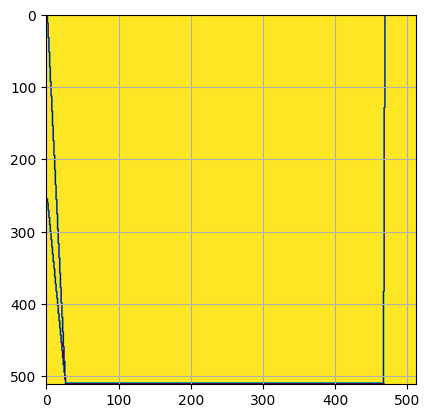

In [514]:
plt.imshow(segm)
plt.grid();

In [515]:
data

{'type': 1,
 'point': array([[ 2.60000000e+01,  5.10000000e+02],
        [-3.55271368e-15,  2.55496101e+02],
        [ 0.00000000e+00,  1.70530257e-13],
        [ 4.66000000e+02,  5.10000000e+02],
        [ 4.68003929e+02, -5.68434189e-14],
        [ 4.67836588e+02,  5.12010000e+02]]),
 'resolution': array([512, 512])}

(26, 510) (1, 255)
(26, 510) (1, 1)
(26, 510) (466, 510)
(466, 510) (468, 1)
(466, 510) (467, 512)


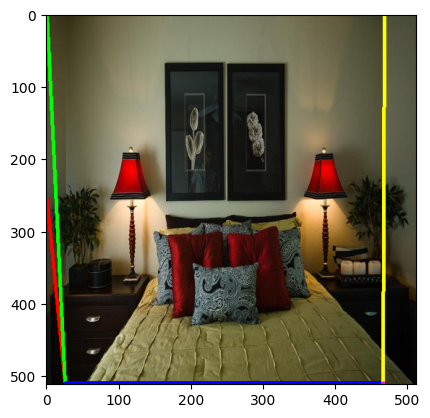

In [516]:
image = np.array(im).copy()
colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255),
    (255, 255, 255),
    (127, 50, 0)
]
for (p1, p2), color in zip(lines, colors):
    print(p1, p2)

    image = cv2.line(image, p1, p2, color, 3)

plt.imshow(image);

In [517]:
import mat73

mat_ts = mat73.loadmat('./result/res_lsun_ts_512_joint/mat_ts_v73/sun_agjyxmbsjvhuoaau.mat')
layout = mat_ts['result']['layout']
layout.shape

AssertionError: ./result/res_lsun_ts_512_joint/mat_ts_v73/sun_agjyxmbsjvhuoaau.mat does not exist

In [ ]:
! pwd

In [ ]:
plt.imshow(layout);